<br>
<hr>

<div style="text-align: justify;">
<br>
<center><div><b style="font-size:21px;">Mestrado profissional em Matemática, Estatística e Computação Aplicadas à Indústria</b></div></center>
<center><div><b style="font-size:22px;color:#72849d">Redes Bayesianas Gaussianas aplicada à predição de vendas em uma grande rede de fast-food brasileira</b></div></center>
<br>
<div style="text-align: justify;">
Resultados apresentados ao Instituto de Ciências Matemáticas e de Computação - ICMC-USP, como parte dos requisitos para obtenção do título de mestre - Mestrado profissional em Matemática, Estatística e Computação Aplicadas à Indústria, sob orientação do <a href="http://conteudo.icmc.usp.br/pessoas/alneu/" target="_blank"> Prof. Dr. Alneu de Andrade Lopes</a> e Co-Orientação <a href="https://scholar.google.com/citations?user=tuOaq-4AAAAJ&hl=pt-BR" target="_blank">Dr. Brett Drury.</a>
</div>
<br>
<hr>
<center><div><b style="font-size:22px;">Previsão de Vendas - SP</b></div></center>
<hr>

In [135]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pyramid.arima import auto_arima, ARIMA
import statsmodels.api as sm
from scipy import stats
import pickle
plt.style.use('seaborn')

In [136]:
data = pd.read_excel('data/food-sp.xlsx')

In [137]:
variavel = 'VENDA'

In [138]:
data.index = data['DATA']

In [139]:
period = 12
interval= 96 - period

In [140]:
df_train = data.iloc[1:interval,]
df_test = data.iloc[interval:96,] 

In [141]:
df_test

,UF,DATA,VENDA,ADICIONAL,BRINDE,MOLHO FESTIVAL,CHOPP COM UNIDADE EM LITRO,BEBIDA COM UNIDADE EM LITRO,BEX SALADAS,DOCE E TORTA,...,PROJETO CHOPP,PRATO,BEX BEBIDAS,LANCHE FRANQUEADO,ACOMPANHAMENTO,SANDUICHE,LINHA ORIGINAL,OUTROS,CALDA BOBS TOP,REFEICAO COLABORADORES
DATA,,,,,,,,,,,,,,,,,,,,,
2017-01-01,SP,2017-01-01,14341265.56,129996.43,38029.64,NaN,NaN,NaN,NaN,NaN,...,4154.2,25081.28,445.8,NaN,1093814.19,3765148.07,NaN,NaN,NaN,NaN
2017-02-01,SP,2017-02-01,11878234.94,114164.82,24563.23,NaN,NaN,NaN,NaN,NaN,...,3375.6,19786.64,313.5,NaN,870661.34,2993359.47,NaN,NaN,NaN,NaN
2017-03-01,SP,2017-03-01,12319539.18,121235.21,39200.80,NaN,NaN,NaN,NaN,NaN,...,2373.0,22675.07,268.5,NaN,1053937.37,3495982.34,NaN,NaN,NaN,NaN
2017-04-01,SP,2017-04-01,13047168.61,132681.37,41004.29,NaN,NaN,NaN,NaN,NaN,...,3187.0,17811.86,258.8,NaN,1185464.84,4015442.28,NaN,NaN,NaN,NaN
2017-05-01,SP,2017-05-01,11480624.06,119337.78,30524.23,NaN,NaN,NaN,NaN,NaN,...,2322.0,16860.52,206.7,NaN,1010901.21,3462352.64,NaN,NaN,NaN,NaN
2017-06-01,SP,2017-06-01,11497298.16,127456.90,40285.54,NaN,NaN,NaN,NaN,NaN,...,2616.0,15457.35,165.8,NaN,1074201.33,3473822.31,NaN,NaN,NaN,NaN
2017-07-01,SP,2017-07-01,13829977.54,163205.54,50032.91,NaN,NaN,NaN,18.0,NaN,...,3215.5,18271.65,230.2,NaN,1297040.96,4009789.69,NaN,NaN,NaN,NaN
2017-08-01,SP,2017-08-01,10637173.93,130671.17,26638.00,NaN,NaN,NaN,18.0,NaN,...,3010.5,14977.67,250.5,NaN,927555.67,2997879.34,NaN,NaN,NaN,NaN
2017-09-01,SP,2017-09-01,11977163.98,139345.36,43165.74,NaN,NaN,NaN,18.0,NaN,...,3066.0,13491.26,157.8,NaN,946356.61,2915608.26,NaN,NaN,NaN,NaN


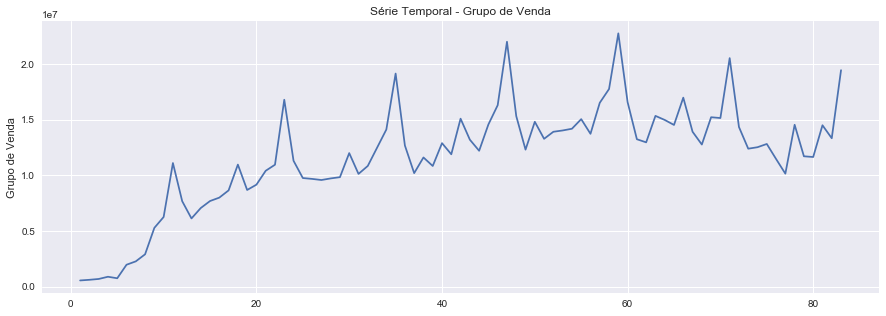

In [142]:
plt.figure(figsize=(15,5))
plt.plot(list(range(1,interval)), df_train[variavel])
plt.ylabel('Grupo de '+ variavel.title())
plt.title('Série Temporal - Grupo de '+ variavel.title())
plt.show()

In [143]:
df_train[variavel+'_box'], lmbda = stats.boxcox(df_train[variavel])

/Users/robsonfernandes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<hr>
<center><div><b style="font-size:22px;">Desenvolvimento do Modelo</b></div></center>
<br>

In [144]:
# model = auto_arima(df_train[variavel+'_box'], 
#                     n_fits=10,
#                     start_p=0, 
#                     start_q=0, 
#                     max_p=5, 
#                     max_q=5, 
#                     m=20,
#                     start_P=0, 
#                     d=1, 
#                     D=1, 
#                     trace=True,
#                     stationary=False,
#                     error_action='ignore',
#                     suppress_warnings=True,
#                     stepwise=True)

# model = ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 1),
#    out_of_sample_size=0, scoring='mse', scoring_args={},
#    seasonal_order=(2, 1, 1, 20), solver='lbfgs', start_params=None,
#    suppress_warnings=True, transparams=True, trend='c')


model = sm.tsa.statespace.SARIMAX(df_train[variavel+'_box'], order=(1, 1, 1), seasonal_order=(2, 1, 1, 20), enforce_stationarity=True)

In [145]:
# model.fit(df_train[variavel+'_box'])
model_fit = model.fit()

In [146]:
# forecast = model.predict(n_periods=12)
# forecast
forecast = model_fit.predict(start=1, end=len(df_train) + period - 1, dynamic=False)
# forecast = forecast.tolist()
forecast = forecast[-period:]

In [147]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        log1 = np.log( np.float64(lmbda) *  np.float64(y) + np.float64(1))/lmbda
        return np.exp(log1)

In [148]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [149]:
y_pred = invboxcox(forecast,lmbda)
y_true = df_test[variavel].values.tolist()

In [150]:
df_test[variavel].values.tolist()

[14341265.56,
 11878234.94,
 12319539.18,
 13047168.61,
 11480624.06,
 11497298.16,
 13829977.54,
 10637173.93,
 11977163.98,
 12951892.49,
 13742491.53,
 18616569.93]

<h1><hr>
<center><div><b style="font-size:22px;">Avaliação de Acuracidade</b></div></center>

In [151]:
acuracia = round(100 - mean_absolute_percentage_error(y_true , y_pred),0)
acuracia

73.0

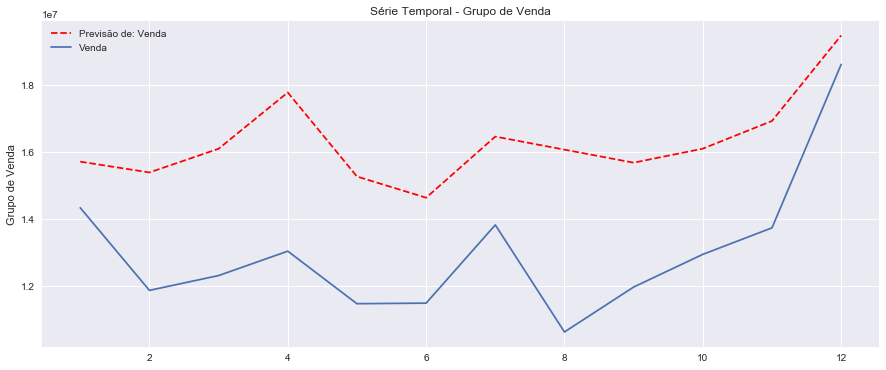

In [152]:
plt.figure(figsize=(15,6))
plt.plot(list(range(1,period + 1)), y_pred, '--', label='Previsão de: '+ variavel.title() ,color='r')
plt.legend()
plt.plot(list(range(1,period + 1)), y_true, label= variavel.title())
plt.legend()
plt.ylabel('Grupo de '+ variavel.title())
plt.title('Série Temporal - Grupo de '+ variavel.title())
plt.show()

In [107]:
{'acuracia' : acuracia, 'real' : y_true, 'previsto' : y_pred}

{'acuracia': 73.0,
 'previsto': array([15716553.95347179, 15394660.79372711, 16101217.7499547 ,
        17780286.0132946 , 15274184.04764918, 14641488.55553709,
        16464713.63679219, 16074735.5958858 , 15685922.63701047,
        16104509.30915611, 16930278.04625586, 19480089.55895559]),
 'real': [14341265.56,
  11878234.94,
  12319539.18,
  13047168.61,
  11480624.06,
  11497298.16,
  13829977.54,
  10637173.93,
  11977163.98,
  12951892.49,
  13742491.53,
  18616569.93]}